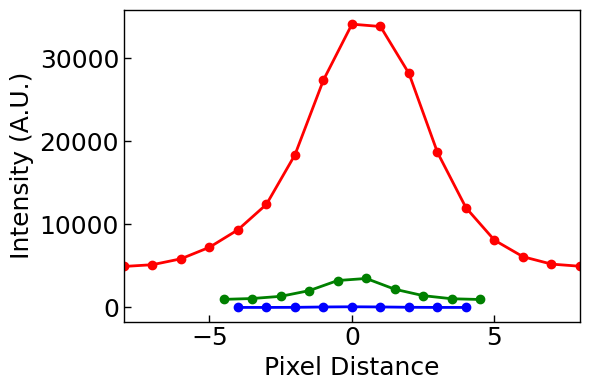

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
import numpy as np

# --- 1. File Selection Function ---
def select_csv_files():
    """Opens dialog to select the three required CSV files."""
    root = tk.Tk()
    root.withdraw() # Hide the main window

    # Define the titles for the file selection dialogs
    file_titles = {
        "Bright_Condensate": "Select CSV for BRIGHT Condensate (RED)",
        "Dim_Condensate": "Select CSV for DIM Condensate (GREEN)",
        "Single_Molecule": "Select CSV for SINGLE Molecule (BLUE)"
    }
    
    file_paths = {}
    
    # Loop through and get the path for each condition
    for key, title in file_titles.items():
        path = filedialog.askopenfilename(
            title=title,
            filetypes=(("CSV files", "*.csv"), ("All files", "*.*"))
        )
        if not path:
            print(f"File selection cancelled for {key}. Exiting.")
            return None
        file_paths[key] = path
        
    return file_paths

# --- 2. Main Plotting Function ---
def plot_intensity_profiles():
    # Get the file paths from the dialog
    paths = select_csv_files()
    if paths is None:
        return

    # !!! CORRECT COLUMN NAMES CONFIRMED BY USER !!!
    DISTANCE_COL = "Distance_(pixels)" 
    INTENSITY_COL = "Gray_Value"
    
    # Load data
    try:
        # Load the data
        bright_df = pd.read_csv(paths["Bright_Condensate"])
        dim_df = pd.read_csv(paths["Dim_Condensate"])
        single_df = pd.read_csv(paths["Single_Molecule"])

        # --- X-AXIS CENTERING CODE ---
        # Find the center point (median) of the distance column in each DataFrame
        # The median is used to ensure the center of the line scan is set to 0.
        bright_center = bright_df[DISTANCE_COL].median()
        dim_center = dim_df[DISTANCE_COL].median()
        single_center = single_df[DISTANCE_COL].median()
        
        # Center the distance column by subtracting the center point
        bright_df['Centered_Distance'] = bright_df[DISTANCE_COL] - bright_center
        dim_df['Centered_Distance'] = dim_df[DISTANCE_COL] - dim_center
        single_df['Centered_Distance'] = single_df[DISTANCE_COL] - single_center

    except KeyError as e:
        print(f"\nFATAL ERROR: Column {e} not found in the CSV files.")
        print("Please check the exact spelling of the column names again.")
        return
    except Exception as e:
        print(f"Error loading CSV files: {e}")
        return

    # --- Plotting ---
    
    fig, ax1 = plt.subplots(figsize=(6, 4))
    
    # --- Plot Data using the new 'Centered_Distance' column ---
    
    # 1. Bright Condensate (RED)
    ax1.plot(
        bright_df['Centered_Distance'],
        bright_df[INTENSITY_COL],
        color="#FF0000", lw=2, marker='o', markersize=6, label="Bright Condensate"
    )

    # 2. Dim Condensate (GREEN)
    ax1.plot(
        dim_df['Centered_Distance'],
        dim_df[INTENSITY_COL],
        color="#008000", lw=2, marker='o', markersize=6, label="Dim Condensate"
    )

    # 3. Single Molecule (BLUE)
    ax1.plot(
        single_df['Centered_Distance'],
        single_df[INTENSITY_COL],
        color="#0000FF", lw=2, marker='o', markersize=6, label="Single Molecule"
    )

    # --- Set Axes Labels and Aesthetics ---
    all_centered_distances = pd.concat([
        bright_df['Centered_Distance'],
        dim_df['Centered_Distance'],
        single_df['Centered_Distance']
    ])
    
    min_dist = all_centered_distances.min()
    max_dist = all_centered_distances.max()
    plt.xlim(min_dist, max_dist) 
    
    # Update X-axis label to reflect the pixel unit
    ax1.set_xlabel('Pixel Distance', fontsize=18)
    ax1.set_ylabel('Intensity (A.U.)', fontsize=18) 

    for ax in [ax1]:
        ax.spines[:].set_linewidth(1)
        ax.tick_params(axis="both", which="major", labelsize=18, direction="in",
                       bottom=True, left=True, length=5, width=1)

    # ax1.legend(fontsize=16, frameon=False, loc='upper right')

    plt.tight_layout()
    plt.savefig("Combined_Intensity_Plot_Centered.png", format="png", bbox_inches="tight", dpi=600)
    plt.show()

# Run the plotting function
plot_intensity_profiles()